# importing the MLBox

In [11]:
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *

In [12]:
paths = ["train.csv","test.csv"]
target_name = "Survived"

# reading and cleaning all files 

In [13]:
rd = Reader()
df = rd.run(paths, target_name)


STEP 1 - reading and building the databases ...


reading csv : train.csv ... - 0.05 s
splitting your current file into train and test sets ... - 0.01 s
reading csv : test.csv ... - 0.04 s
splitting your current file into train and test sets ... - 0.01 s
crunching your current file with the previous one ... - 0.04 s

CPU time for STEP 1: 0.16 seconds


STEP 2 - casting the databases ...


training set : casting data ... - 1.41 s
test set : casting data ... - 1.53 s

CPU time for STEP 2: 2.96 seconds


STEP 3 - analysing the training set ...


> Number of categorical features: 5
> Number of numerical features: 6
> Number of training samples : 891
> Number of test samples : 418

> Task : classification
> Target value counts :

no     549
yes    342
Name: Survived, dtype: int64

more information available if calling '.get_stats()' ...

CPU time for STEP 3: 0.09 seconds



In [14]:
cl = Cleaner()
df = cl.run(df)


STEP 4 - cleaning the databases ...


dropping duplicates on the training set ... - 0.03 s

> Number of training samples dropped : 0 out of 891

dropping sparse features and sparse samples ... - 0.01 s

> Number of training samples dropped : 0 out of 891
> Number of features dropped : 0
> Top 10 sparse features (%) : 
Cabin          0.771044
Age            0.198653
Embarked       0.002245
Ticket         0.000000
SibSp          0.000000
Sex            0.000000
Pclass         0.000000
PassengerId    0.000000
Parch          0.000000
Name           0.000000
dtype: float64

dropping constant features ... - 0.08 s

> Number of features dropped : 0

dropping drifting features ... - 1.62 s

> Number of features dropped : 3
> Top 10 drifting features (%) : 

PassengerId    0.996484
Name           0.991847
Ticket         0.708192
Cabin          0.185622
Embarked       0.078020
Fare           0.037094
SibSp          0.021944
Pclass         0.019441
Sex            0.011223
Age            0.008135

# tuning

In [9]:
opt = Optimiser()

/home/datageek/anaconda2/lib/python2.7/site-packages/mlbox/optimisation/optimiser.py:149: UserWarning: Optimiser will save all your fitted models into directory 'save/joblib'. Please clear it regularly.
  +str(self.to_path)+"/joblib'. Please clear it regularly.")


manuel

In [17]:
parameters = {
    
        "encoding" : {
        
            "missing_values" : {"numerical_strategy":0, "categorical_strategy":"NULL"},
            "categorical_features" : {"strategy":"random_projection"}
        
    },
    
        "modeling" : {
        
            "feature_selection" : {"strategy" : "variance", "threshold":0.2},
            "estimation" : {"strategy":"LightGBM", "max_depth" : 5}
        
    }
    
        }

opt.evaluate(df, parameters)

================================================== TESTING HYPER-PARAMETERS ... ==================================================

> ENCODING: - missing values: {'numerical_strategy': 0, 'categorical_strategy': 'NULL'}

            - categorical features: {'verbose': False, 'strategy': 'random_projection'}


> MODELING: - feature selection: {'threshold': 0.2, 'strategy': 'variance'}

            - estimation: {'num_leaves': 31, 'reg_alpha': 0, 'subsample_for_bin': 50000, 'colsample_bytree': 0.8, 'silent': True, 'learning_rate': 0.05, 'nthread': -1, 'min_child_weight': 5, 'strategy': 'LightGBM', 'n_estimators': 500, 'subsample': 0.9, 'reg_lambda': 0, 'subsample_freq': 1, 'min_child_samples': 10, 'max_bin': 255, 'objective': 'binary', 'min_split_gain': 0, 'seed': 0, 'max_depth': 5, 'boosting_type': 'gbdt'}


MEAN SCORE : roc_auc = 0.727535594128
VARIANCE : 0.0127833851384 (fold 1 = 0.740318979266, fold 2 = 0.71475220899)
CPU time: 2.30272984505 seconds



0.72753559412798752

In [18]:
parameters = {

        "modeling" : {
        
            "estimation" : {"strategy":"XGBoost"}
        
    }
    
        }

opt.evaluate(df, parameters)

================================================== TESTING HYPER-PARAMETERS ... ==================================================

> ENCODING: - missing values: {'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

            - categorical features: {'verbose': False, 'strategy': 'label_encoding'}


> MODELING: - estimation: {'reg_alpha': 0, 'colsample_bytree': 0.8, 'silent': True, 'colsample_bylevel': 1.0, 'scale_pos_weight': 1, 'learning_rate': 0.05, 'missing': None, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'strategy': 'XGBoost', 'n_estimators': 500, 'subsample': 0.9, 'reg_lambda': 1, 'seed': 0, 'min_child_weight': 1, 'objective': 'binary:logistic', 'max_depth': 6, 'gamma': 0}


MEAN SCORE : roc_auc = 0.863051878757
VARIANCE : 0.00907996600659 (fold 1 = 0.872131844763, fold 2 = 0.85397191275)
CPU time: 2.24671816826 seconds



0.86305187875683453

In [19]:
parameters = {

        "modeling" : {
        
            "estimation" : {"strategy":"RandomForest"}
        
    }
    
        }

opt.evaluate(df, parameters)

================================================== TESTING HYPER-PARAMETERS ... ==================================================

> ENCODING: - missing values: {'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

            - categorical features: {'verbose': False, 'strategy': 'label_encoding'}


> MODELING: - estimation: {'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'min_impurity_decrease': 0.0, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'strategy': 'RandomForest', 'n_estimators': 400, 'max_features': 'sqrt', 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 0, 'min_impurity_split': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'class_weight': None}


MEAN SCORE : roc_auc = 0.87600493991
VARIANCE : 0.00858335564636 (fold 1 = 0.867421584264, fold 2 = 0.884588295556)
CPU time: 10.0883591175 seconds



0.87600493991004935

In [20]:
parameters = {

        "modeling" : {
        
            "estimation" : {"strategy":"ExtraTrees"}
        
    }
    
        }

opt.evaluate(df, parameters)

================================================== TESTING HYPER-PARAMETERS ... ==================================================

> ENCODING: - missing values: {'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

            - categorical features: {'verbose': False, 'strategy': 'label_encoding'}


> MODELING: - estimation: {'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'min_impurity_decrease': 0.0, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'strategy': 'ExtraTrees', 'n_estimators': 400, 'max_features': 'sqrt', 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 0, 'min_impurity_split': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'class_weight': None}


MEAN SCORE : roc_auc = 0.874552536506
VARIANCE : 0.0153074541031 (fold 1 = 0.859245082403, fold 2 = 0.889859990609)
CPU time: 9.81152200699 seconds



0.87455253650605169

In [21]:
parameters = {

        "modeling" : {
        
            "estimation" : {"strategy":"Tree"}
        
    }
    
        }

opt.evaluate(df, parameters)

================================================== TESTING HYPER-PARAMETERS ... ==================================================

> ENCODING: - missing values: {'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

            - categorical features: {'verbose': False, 'strategy': 'label_encoding'}


> MODELING: - estimation: {'presort': False, 'splitter': 'best', 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'max_features': None, 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 0, 'min_impurity_split': None, 'min_samples_split': 2, 'strategy': 'Tree', 'max_depth': None, 'class_weight': None}


MEAN SCORE : roc_auc = 0.761438627535
VARIANCE : 0.0257490385996 (fold 1 = 0.787187666135, fold 2 = 0.735689588936)
CPU time: 0.437391996384 seconds



0.76143862753543889

In [22]:
parameters = {

        "modeling" : {
        
            "estimation" : {"strategy":"Bagging"}
        
    }
    
        }

opt.evaluate(df, parameters)

================================================== TESTING HYPER-PARAMETERS ... ==================================================

> ENCODING: - missing values: {'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

            - categorical features: {'verbose': False, 'strategy': 'label_encoding'}


> MODELING: - estimation: {'warm_start': False, 'max_samples': 0.9, 'base_estimator': None, 'n_jobs': -1, 'verbose': 0, 'bootstrap': False, 'oob_score': False, 'strategy': 'Bagging', 'n_estimators': 500, 'random_state': 0, 'max_features': 0.85, 'bootstrap_features': False}


MEAN SCORE : roc_auc = 0.854613713004
VARIANCE : 0.00420606371048 (fold 1 = 0.858819776715, fold 2 = 0.850407649294)
CPU time: 7.22818994522 seconds



0.85461371300403188

In [23]:
parameters = {

        "modeling" : {
        
            "estimation" : {"strategy":"AdaBoost"}
        
    }
    
        }

opt.evaluate(df, parameters)

================================================== TESTING HYPER-PARAMETERS ... ==================================================

> ENCODING: - missing values: {'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

            - categorical features: {'verbose': False, 'strategy': 'label_encoding'}


> MODELING: - estimation: {'base_estimator': None, 'algorithm': 'SAMME.R', 'learning_rate': 0.05, 'strategy': 'AdaBoost', 'n_estimators': 400, 'random_state': 0}


MEAN SCORE : roc_auc = 0.83638218528
VARIANCE : 0.0133147844174 (fold 1 = 0.849696969697, fold 2 = 0.823067400862)
CPU time: 6.71220302582 seconds



0.83638218527961139

In [ ]:
parameters = {

        "modeling" : {
        
            "estimation" : {"strategy":"Linear"}
        
    }
    
        }

opt.evaluate(df, parameters)

================================================== TESTING HYPER-PARAMETERS ... ==================================================

> ENCODING: - missing values: {'numerical_strategy': 'mean', 'categorical_strategy': '<NULL>'}

            - categorical features: {'verbose': False, 'strategy': 'label_encoding'}


> MODELING: - estimation: {'warm_start': False, 'C': 1.0, 'n_jobs': -1, 'intercept_scaling': 1, 'fit_intercept': True, 'max_iter': 100, 'class_weight': None, 'strategy': 'Linear', 'penalty': 'l2', 'multi_class': 'ovr', 'random_state': 0, 'dual': False, 'tol': 0.0001, 'solver': 'liblinear', 'verbose': 0}



semi auto

In [30]:
parameters = {
    
        "encoding" : {
        
            "missing_values" : {"numerical_strategy":{0}, "categorical_strategy":{"NULL"}},
            "categorical_features" : {"strategy":{"random_projection"}}
        
    },
    
        "modeling" : {
        
            "feature_selection" : {"strategy" : {"variance"}, "threshold":(0.3, 0.7)},
            "estimation" : {"strategy":{"LightGBM", "XGBoost", "RandomForest"}, "max_depth" : {7,8,9,10}}
        
    }
    
        }


best = opt.run(df, space=parameters, max_evals=10)


STEP 5 - tuning/evaluating the pipeline ...


================================================== TESTING HYPER-PARAMETERS ... ==================================================

> ENCODING: - missing values: {'numerical_strategy': 0, 'categorical_strategy': 'NULL'}

            - categorical features: {'verbose': False, 'strategy': 'random_projection'}


> MODELING: - feature selection: {'threshold': 0.5119306246060741, 'strategy': 'variance'}

            - estimation: {'warm_start': False, 'oob_score': False, 'n_jobs': -1, 'min_impurity_decrease': 0.0, 'verbose': 0, 'max_leaf_nodes': None, 'bootstrap': True, 'strategy': 'RandomForest', 'n_estimators': 400, 'max_features': 'sqrt', 'min_weight_fraction_leaf': 0.0, 'criterion': 'gini', 'random_state': 0, 'min_impurity_split': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'class_weight': None}


MEAN SCORE : roc_auc = 0.698499963135
VARIANCE : 0.0176722856688 (fold 1 = 0.716172248804, fold 2 = 0.680827677466)
CPU


STEP 6 - fitting the pipeline on training set ...



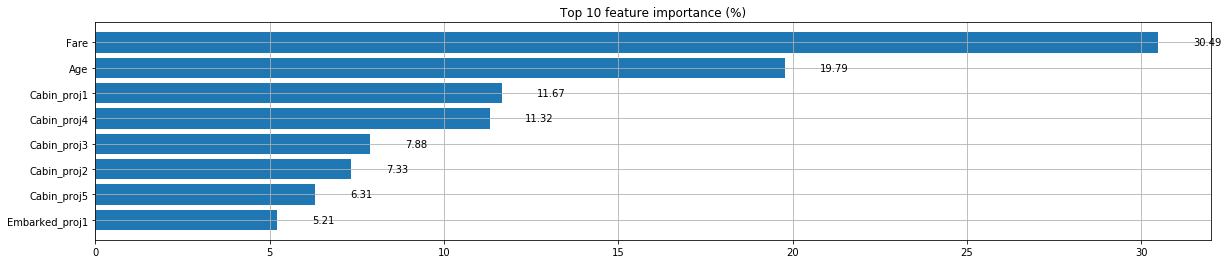


> Feature importances dumped into directory : save

CPU time for STEP 6: 5.95 seconds


STEP 7 - predicting on test set ...


predicting ... - 0.55 s

> Overview on predictions : 

        0.0       1.0  Survived_predicted
0  0.838580  0.161420                 0.0
1  0.901509  0.098491                 0.0
2  0.794574  0.205426                 0.0
3  0.758676  0.241324                 0.0
4  0.673051  0.326949                 0.0
5  0.800680  0.199320                 0.0
6  0.833546  0.166454                 0.0
7  0.617996  0.382004                 0.0
8  0.650741  0.349259                 0.0
9  0.658304  0.341696                 0.0

dumping predictions into directory : save ... - 0.0 s

CPU time for STEP 7: 0.56 seconds



<mlbox.prediction.predictor.Predictor instance at 0x7f3e48469710>

In [31]:
prd = Predictor()
prd.run(df, best)